<h1>QuickStart

In [193]:
import os
from langchain.llms import OpenAI
# os.environ["OPENAI_API_KEY"] = ""

# Building A Language Model Application
### LLMS: Get predictions from a language model

In [194]:
llm = OpenAI(temperature=0.9)

In [195]:
text = "what is an agent and tool in langchain?"
print(llm(text))



A Langchain agent is a software program that enables users to communicate with other users, such as anonymous online chat users, on Langchain. The agent is designed to act like a hired translator or interpreter and helps users understand each other by automatically translating messages between different languages. The agent is connected to a set of tools, such as a dictionary, that it uses to help with the translation. With these tools, the agent can provide a more accurate translation than someone who is not a native speaker of the languages being used.


### Prompt Templates: Manage prompts for LLMs

In [196]:
from langchain.prompts import PromptTemplate

A prompt template refers to a reproducible way to generate a prompt. It contains a text string (“the template”), that can take in a set of parameters from the end user and generate a prompt.

The prompt template may contain:

instructions to the language model,

a set of few shot examples to help the language model generate a better response,

a question to the language model.

The following code snippet contains an example of a prompt template:

In [197]:
# An example prompt with no input variables
no_input_prompt = PromptTemplate(input_variables=[], template="Tell me a joke.")
no_input_prompt.format()
# -> "Tell me a joke."

'Tell me a joke.'

In [198]:
# An example prompt with one input variable
one_input_prompt = PromptTemplate(input_variables=["adjective"], template="Tell me a {adjective} joke.")
one_input_prompt.format(adjective="funny")
# -> "Tell me a funny joke."

'Tell me a funny joke.'

In [199]:
#sarcastic
#funny
print(llm(one_input_prompt.format(adjective="funny")))



Q: What did the fish say when he hit the wall?
A: Dam!


In [152]:
# An example prompt with multiple input variables
multiple_input_prompt = PromptTemplate(
    input_variables=["adjective", "content"], 
    template="Tell me a {adjective} joke about {content}."
)
multiple_input_prompt.format(adjective="funny", content="chickens")
# -> "Tell me a funny joke about chickens."

'Tell me a funny joke about chickens.'

In [153]:
print(llm(multiple_input_prompt.format(adjective="funny", content="chickens")))



Q: Why did the chicken cross the playground? 
A: To get to the other slide!


### Agents

In [200]:
from langchain.agents import load_tools
from langchain.agents import initialize_agent
from langchain.agents import AgentType
from langchain.llms import OpenAI

In [154]:
llm = OpenAI(temperature=0)

In [201]:
# Load in some tools to use

# os.environ["SERPAPI_API_KEY"] = "..."

tools = load_tools(["serpapi", "llm-math"], llm=llm)

In [159]:
# Finally, let's initialize an agent with:
# 1. The tools
# 2. The language model
# 3. The type of agent we want to use.

agent = initialize_agent(tools, llm, agent="zero-shot-react-description", verbose=True)

In [160]:
# Now let's test it out!
agent.run("Who is Leo DiCaprio's girlfriend? What is her current age raised to the 0.43 power?")



> Entering new AgentExecutor chain...
 I need to find out who Leo DiCaprio's girlfriend is and then calculate her age raised to the 0.43 power.
Action: Search
Action Input: "Leo DiCaprio girlfriend"
Observation: DiCaprio broke up with girlfriend Camila Morrone, 25, in the summer of 2022, after dating for four years. He's since been linked to another famous supermodel – Gigi Hadid. The power couple were first supposedly an item in September after being spotted getting cozy during a party at New York Fashion Week.
Thought: I need to calculate Gigi Hadid's age raised to the 0.43 power.
Action: Calculator
Action Input: 25^0.43
Observation: Answer: 3.991298452658078
Thought: I now know the final answer.
Final Answer: Gigi Hadid's age raised to the 0.43 power is 3.991298452658078.

> Finished chain.


"Gigi Hadid's age raised to the 0.43 power is 3.991298452658078."

In [202]:
agent.run("who is the prime minister of japan?")



> Entering new AgentExecutor chain...
{
    "action": "Final Answer",
    "action_input": "The current prime minister of Japan is Yoshihide Suga."
}

> Finished chain.


'The current prime minister of Japan is Yoshihide Suga.'

In [203]:
agent.run("calculate 413*234")



> Entering new AgentExecutor chain...
{
    "action": "Final Answer",
    "action_input": "96442"
}

> Finished chain.


'96442'

### Types of Agents

### Self Ask With Search

In [204]:
from langchain import OpenAI, SerpAPIWrapper
from langchain.agents import initialize_agent, Tool
from langchain.agents import AgentType

llm = OpenAI(temperature=0)
search = SerpAPIWrapper()
tools = [
    Tool(
        name="Intermediate Answer",
        func=search.run,
        description="useful for when you need to ask with search"
    )
]

self_ask_with_search = initialize_agent(tools, llm, agent=AgentType.SELF_ASK_WITH_SEARCH, verbose=True)
self_ask_with_search.run("What is the hometown of the reigning men's U.S. Open champion?")



> Entering new AgentExecutor chain...
 Yes.
Follow up: Who is the reigning men's U.S. Open champion?
Intermediate answer: Carlos Alcaraz Garfia
Follow up: Where is Carlos Alcaraz Garfia from?
Intermediate answer: El Palmar, Spain
So the final answer is: El Palmar, Spain

> Finished chain.


'El Palmar, Spain'

### Conversation Agent

In [164]:
from langchain.agents import Tool
from langchain.agents import AgentType
from langchain.memory import ConversationBufferMemory
from langchain import OpenAI
from langchain.utilities import SerpAPIWrapper
from langchain.agents import initialize_agent

In [205]:
search = SerpAPIWrapper()
tools = [
    Tool(
        name = "Current Search",
        func=search.run,
        description="useful for when you need to answer questions about current events or the current state of the world"
    ),
]

In [206]:
memory = ConversationBufferMemory(memory_key="chat_history")

In [207]:
llm=OpenAI(temperature=0)
agent_chain = initialize_agent(tools, llm, agent=AgentType.CONVERSATIONAL_REACT_DESCRIPTION, verbose=True, memory=memory)

In [208]:
agent_chain.run(input="hi, i am bob")



> Entering new AgentExecutor chain...

Thought: Do I need to use a tool? No
AI: Hi Bob, nice to meet you! How can I help you today?

> Finished chain.


'Hi Bob, nice to meet you! How can I help you today?'

In [171]:
agent_chain.run("what are some good dinners to make this week, if i like thai food?")



> Entering new AgentExecutor chain...
Thought: Do I need to use a tool? No
AI: Thai food is a great option for dinner! Some popular dishes include Pad Thai, Tom Yum Soup, and Green Curry. You can also try making your own Thai dishes with ingredients like lemongrass, coconut milk, and fish sauce. Enjoy!

> Finished chain.


'Thai food is a great option for dinner! Some popular dishes include Pad Thai, Tom Yum Soup, and Green Curry. You can also try making your own Thai dishes with ingredients like lemongrass, coconut milk, and fish sauce. Enjoy!'

### Custom Tools

In [173]:
from langchain.tools import BaseTool
from math import pi
from typing import Union


class CircumferenceTool(BaseTool):
    name = "Circumference calculator"
    description = "use this tool when you need to calculate a circumference using the radius of a circle"

    def _run(self, radius: Union[int, float]):
        return float(radius)*2.0*pi
    
    def _arun(self, radius: Union[int, float]):
        raise NotImplementedError("This tool does not support async")
     

When defining a tool like this using the BaseTool template we must define name and description attributes, alongside _run and _arun methods. When a tool us used the _run method is called by default. The _arun method is called when the tool is to be used asyncronously. We do not cover that in this walkthrough so for now we create it with a NotImplementedError.

In [174]:
import os
from langchain.chat_models import ChatOpenAI
from langchain.chains.conversation.memory import ConversationBufferWindowMemory

OPENAI_API_KEY = os.environ.get('OPENAI_API_KEY') or 'OPENAI_API_KEY'

# initialize LLM (we use ChatOpenAI because we'll later define a `chat` agent)
llm = ChatOpenAI(
    openai_api_key=OPENAI_API_KEY,
    temperature=0,
    model_name='gpt-3.5-turbo'
)
# initialize conversational memory
conversational_memory = ConversationBufferWindowMemory(
    memory_key='chat_history',
    k=5,
    return_messages=True
)


In [175]:
from langchain.agents import initialize_agent

tools = [CircumferenceTool()]

# initialize agent with tools
agent = initialize_agent(
    agent='chat-conversational-react-description',
    tools=tools,
    llm=llm,
    verbose=True,
    max_iterations=3,
    early_stopping_method='generate',
    memory=conversational_memory
)

In [209]:
agent("can you calculate the circumference of a circle that has a radius of 7.81mm")




> Entering new AgentExecutor chain...
```json
{
    "action": "Circumference calculator",
    "action_input": "7.81"
}
```
Observation: 49.071677249072565
Thought:```json
{
    "action": "Final Answer",
    "action_input": "The circumference of a circle with a radius of 7.81mm is approximately 49.07 units."
}
```

> Finished chain.


{'input': 'can you calculate the circumference of a circle that has a radius of 7.81mm',
 'chat_history': [HumanMessage(content='can you calculate the circumference of a circle that has a radius of 7.81mm', additional_kwargs={}, example=False),
  AIMessage(content='The circumference of a circle with a radius of 7.81mm is approximately 49.03mm.', additional_kwargs={}, example=False),
  HumanMessage(content='can you calculate the circumference of a circle that has a radius of 7mm', additional_kwargs={}, example=False),
  AIMessage(content='The circumference of a circle with a radius of 7mm is approximately 44 units.', additional_kwargs={}, example=False),
  HumanMessage(content='who is the prime minister of japan?', additional_kwargs={}, example=False),
  AIMessage(content='The current prime minister of Japan is Yoshihide Suga.', additional_kwargs={}, example=False),
  HumanMessage(content='calculate 413*234', additional_kwargs={}, example=False),
  AIMessage(content='96442', additional_

In [177]:
agent("can you calculate the circumference of a circle that has a radius of 7mm")



> Entering new AgentExecutor chain...
```json
{
    "action": "Circumference calculator",
    "action_input": "7"
}
```
Observation: 43.982297150257104
Thought:```json
{
    "action": "Final Answer",
    "action_input": "The circumference of a circle with a radius of 7mm is approximately 44 units."
}
```

> Finished chain.


{'input': 'can you calculate the circumference of a circle that has a radius of 7mm',
 'chat_history': [HumanMessage(content='can you calculate the circumference of a circle that has a radius of 7.81mm', additional_kwargs={}, example=False),
  AIMessage(content='The circumference of a circle with a radius of 7.81mm is approximately 49.03mm.', additional_kwargs={}, example=False)],
 'output': 'The circumference of a circle with a radius of 7mm is approximately 44 units.'}

## Chains

In [178]:
from langchain.prompts import PromptTemplate
from langchain.llms import OpenAI

llm = OpenAI(temperature=0.9)
prompt = PromptTemplate(
    input_variables=["product"],
    template="What is a good name for a company that makes {product}?",
)

In [210]:
from langchain.chains import LLMChain
chain = LLMChain(llm=llm, prompt=prompt)

# Run the chain only specifying the input variable.
print(chain.run("colorful socks"))



Socktastic!


In [180]:
print(chain.run("data science"))



DataScientics.


In [211]:
second_prompt = PromptTemplate(
    input_variables=["company_name"],
    template="Write a catchphrase for the following company: {company_name}",
)
chain_two = LLMChain(llm=llm, prompt=second_prompt)

In [212]:
from langchain.chains import SimpleSequentialChain
overall_chain = SimpleSequentialChain(chains=[chain, chain_two], verbose=True)

# Run the chain specifying only the input variable for the first chain.
catchphrase = overall_chain.run("socks")
print(catchphrase)



> Entering new SimpleSequentialChain chain...


Socktastic!


"Step into Comfort with Socktastic!"

> Finished chain.


"Step into Comfort with Socktastic!"


## SUMMARY CHAIN

In [213]:
from langchain import OpenAI, PromptTemplate, LLMChain
from langchain.text_splitter import CharacterTextSplitter
from langchain.chains.mapreduce import MapReduceChain
from langchain.prompts import PromptTemplate

llm = OpenAI(temperature=0)

text_splitter = CharacterTextSplitter()

In [214]:
text_splitter = CharacterTextSplitter()
with open("union.txt",encoding="utf8") as f:
    state_of_the_union = f.read()
texts = text_splitter.split_text(state_of_the_union)
print(len(texts))

11


The chain type "Map Reduce" is a method that helps with this. You first generate a summary of smaller chunks (that fit within the token limit) and then you get a summary of the summaries.\

In [185]:
llm.get_num_tokens(state_of_the_union) ##token length

9331

In [215]:
from langchain.chains.summarize import load_summarize_chain
from langchain.docstore.document import Document

docs = [Document(page_content=t) for t in texts[:3]]
chain = load_summarize_chain(llm, chain_type="map_reduce")


In [ ]:
map_prompt = """
Write a concise summary of the following:
"{text}"
CONCISE SUMMARY:
"""
map_prompt_template = PromptTemplate(template=map_prompt, input_variables=["text"])

In [187]:
combine_prompt = """
Write a concise summary of the following text delimited by triple backquotes.
Return your response in bullet points which covers the key points of the text.
```{text}```
BULLET POINT SUMMARY:
"""
combine_prompt_template = PromptTemplate(template=combine_prompt, input_variables=["text"])

In [216]:
chain = load_summarize_chain(llm, chain_type="map_reduce",combine_prompt=combine_prompt_template)
print(chain.run(docs))

- The US and its allies are taking action to hold Russia accountable for its aggression in Ukraine, including economic sanctions, cutting off access to technology, and a dedicated task force to go after the crimes of Russian oligarchs.
- The US is providing military, economic, and humanitarian assistance to Ukraine, and has mobilized forces to protect NATO countries.
- President Biden passed the American Rescue Plan to provide immediate economic relief, creating jobs and the economy grew at a rate of 5.7%.
- Biden and Vice President Harris ran for office with a new economic vision to invest in America, educate Americans, and build the economy from the bottom up.
- The Bipartisan Infrastructure Law was passed to rebuild America and create jobs.


In [189]:
prompt_template = """Write a concise summary of the following:


{text}


CONCISE SUMMARY IN ITALIAN:"""
PROMPT = PromptTemplate(template=prompt_template, input_variables=["text"])
chain = load_summarize_chain(OpenAI(temperature=0), chain_type="map_reduce", return_intermediate_steps=True, map_prompt=PROMPT, combine_prompt=PROMPT)
chain({"input_documents": docs}, return_only_outputs=True)

{'intermediate_steps': ["\n\nQuesta sera, ci incontriamo come democratici, repubblicani e indipendenti, ma soprattutto come americani. La settimana scorsa, Vladimir Putin ha cercato di scuotere le fondamenta del mondo libero, ma ha sottovalutato la forza della gente ucraina. Insieme ai nostri alleati, stiamo imponendo sanzioni economiche a Putin, tagliando l'accesso della Russia al sistema finanziario internazionale e bloccando l'accesso della Russia alla tecnologia. Il Dipartimento di Giustizia degli Stati Uniti sta anche creando una task force dedicata per andare dopo i crimini degli oligarchi russi.",
  "\n\nGli Stati Uniti e i loro alleati europei stanno lavorando insieme per sequestrare yacht, appartamenti di lusso e jet privati di Putin. Inoltre, stanno chiudendo lo spazio aereo americano a tutti i voli russi, isolando ulteriormente la Russia e mettendo una pressione aggiuntiva sulla loro economia. Stanno fornendo più di un miliardo di dollari in assistenza diretta all'Ucraina e 

### Usecases

## Querying Tabular Data

## SQL Database Agent - Titanic Dataset

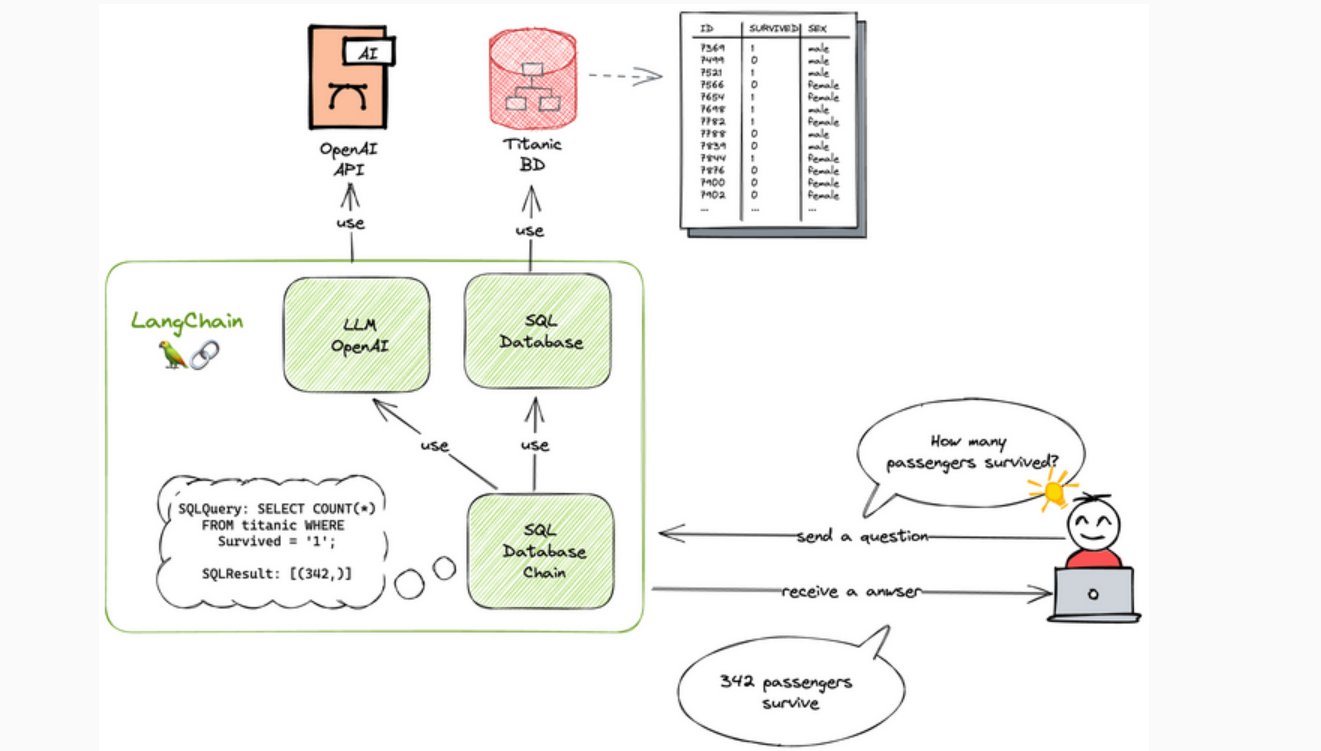

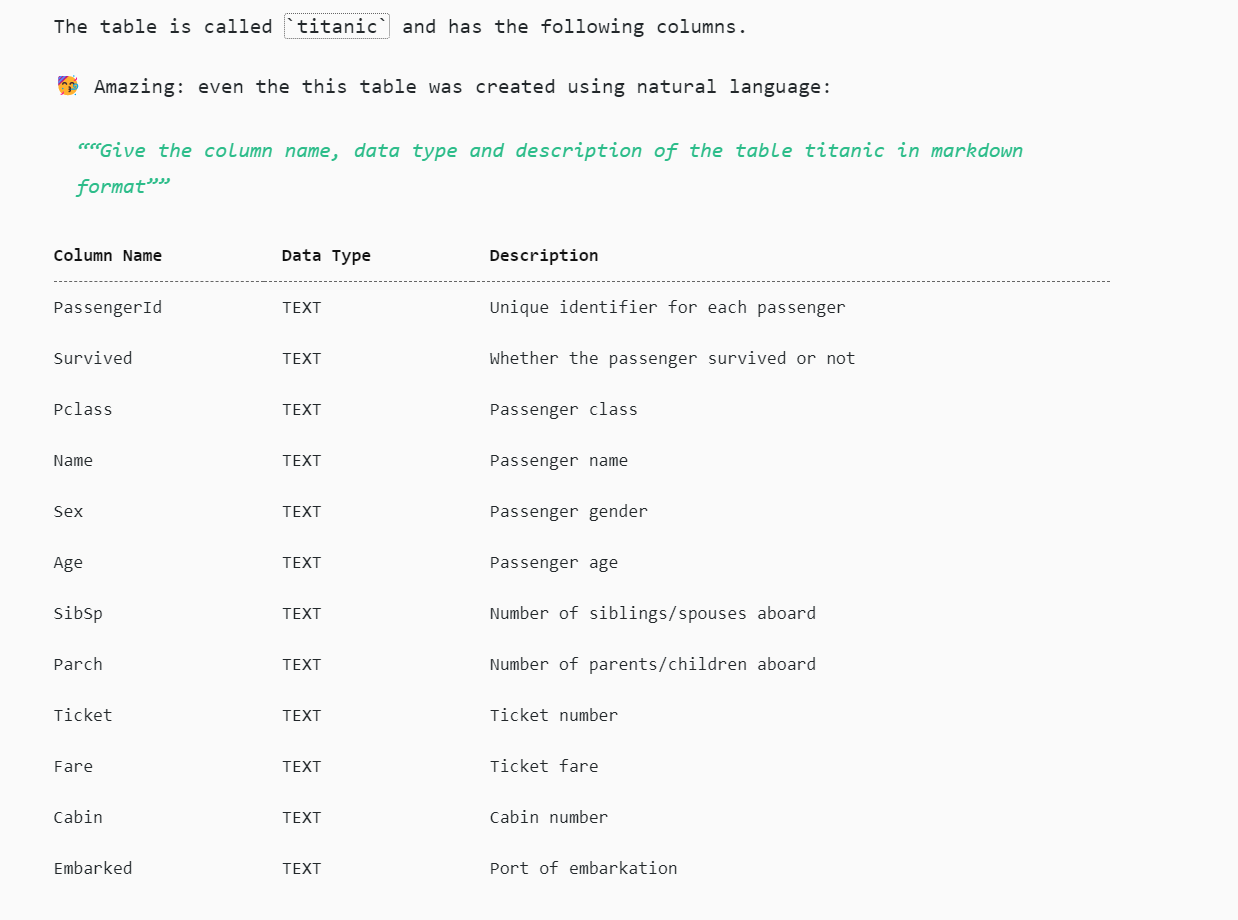

In [217]:
from langchain import OpenAI, SQLDatabase, SQLDatabaseChain

In [218]:
db = SQLDatabase.from_uri("sqlite:///titanic.db")
llm = OpenAI(temperature=0)

In [219]:
db_chain = SQLDatabaseChain(llm=llm, database=db, verbose=True)
db_chain.run("How many passengers were in each class?")



> Entering new SQLDatabaseChain chain...
How many passengers were in each class?
SQLQuery:SELECT "Pclass", COUNT("PassengerId") FROM titanic GROUP BY "Pclass" LIMIT 5;
SQLResult: [('1', 216), ('2', 184), ('3', 491)]
Answer:There were 216 passengers in class 1, 184 passengers in class 2, and 491 passengers in class 3.
> Finished chain.


'There were 216 passengers in class 1, 184 passengers in class 2, and 491 passengers in class 3.'

How many passengers survived?
How many passengers were in each class?
How many passengers survived/died within each class?
What was the average age of survivors vs non-survivors?
What was the average age of each passenger class?
What was the average fare by passenger class? By survival?
How many siblings/spouses aboard on average, by passenger class? By survival?
How many parents/children aboard on average, by passenger class? By survival?

In [107]:
db_chain.run("How many passengers survived?")



> Entering new SQLDatabaseChain chain...
How many passengers survived?
SQLQuery:SELECT COUNT("PassengerId") FROM titanic WHERE "Survived" = 1;
SQLResult: [(342,)]
Answer:342 passengers survived.
> Finished chain.


'342 passengers survived.'

In [108]:
db_chain.run("What was the average age of survivors vs non-survivors?")



> Entering new SQLDatabaseChain chain...
What was the average age of survivors vs non-survivors?
SQLQuery:SELECT AVG("Age") AS "Average Age", "Survived" FROM titanic GROUP BY "Survived" LIMIT 5;
SQLResult: [(30.62617924528302, '0'), (28.343689655172415, '1')]
Answer:The average age of survivors was 28.34 years and the average age of non-survivors was 30.62 years.
> Finished chain.


'The average age of survivors was 28.34 years and the average age of non-survivors was 30.62 years.'

In [109]:
db_chain.run("How many siblings/spouses aboard on average, by passenger class? By survival?")



> Entering new SQLDatabaseChain chain...
How many siblings/spouses aboard on average, by passenger class? By survival?
SQLQuery:SELECT "Pclass", AVG("SibSp") AS "Average SibSp" FROM titanic GROUP BY "Pclass"
UNION
SELECT "Survived", AVG("SibSp") AS "Average SibSp" FROM titanic GROUP BY "Survived";
SQLResult: [('0', 0.5537340619307832), ('1', 0.4166666666666667), ('1', 0.47368421052631576), ('2', 0.40217391304347827), ('3', 0.615071283095723)]
Answer:The average number of siblings/spouses aboard for passengers in class 1 is 0.42, class 2 is 0.40, and class 3 is 0.62. The average number of siblings/spouses aboard for passengers who survived is 0.47, and for those who did not survive is 0.55.
> Finished chain.


'The average number of siblings/spouses aboard for passengers in class 1 is 0.42, class 2 is 0.40, and class 3 is 0.62. The average number of siblings/spouses aboard for passengers who survived is 0.47, and for those who did not survive is 0.55.'

## Pandas Dataframe Agent

In [129]:
from langchain.agents import create_pandas_dataframe_agent

In [132]:
from langchain.llms import OpenAI
import pandas as pd

df = pd.read_csv('orders.csv',encoding="utf-8")

In [133]:
df

,order_date,pages_visited,order_id,customer_id,tshirt_category,tshirt_price,tshirt_quantity
0,2016/09/04,9,HTS-038040-0002,038040,White T-Shirt M,20.0,1
1,2014/11/14,11,HTS-801797-0001,801797,White T-Shirt M,20.0,1
2,2017/02/26,10,HTS-vft1eu-0003,vft1eu,White T-Shirt F,18.0,3
3,2013/12/01,10,HTS-914324-0001,914324,Wh Tshirt F,18.0,1
4,2015/10/22,12,HTS-88ua9r-0001,88ua9r,White T-Shirt M,20.0,1
...,...,...,...,...,...,...,...
26547,2016/11/19,13,HTS-n641x4-0001,n641x4,White T-Shirt M,20.0,1
26548,2016/08/02,4,HTS-q0nm12-0001,q0nm12,White T-Shirt M,20.0,1
26549,2017/03/09,6,HTS-sby0iz-0001,sby0iz,White T-Shirt M,20.0,1
26550,2016/10/04,11,HTS-uz70x4-0001,uz70x4,Hoodie,23.0,5


In [134]:
agent = create_pandas_dataframe_agent(OpenAI(temperature=0), df, verbose=True)

In [135]:
agent.run("how many rows are there?")



> Entering new AgentExecutor chain...
Thought: I need to count the rows
Action: python_repl_ast
Action Input: len(df)
Observation: 26552
Thought: I now know the final answer
Final Answer: There are 26552 rows.

> Finished chain.


'There are 26552 rows.'

In [137]:
agent.run("how many t-shirts are sold in different catgeory ")



> Entering new AgentExecutor chain...
Thought: I need to group the data by tshirt_category and count the tshirt_quantity
Action: python_repl_ast
Action Input: df.groupby('tshirt_category')['tshirt_quantity'].sum()
Observation: tshirt_category
Bl Tshirt F          557
Bl Tshirt M          974
Black T-Shirt F     8966
Black T-Shirt M    11661
Hoodie             16638
Tennis Shirt        6724
Wh Tshirt F          701
Wh Tshirt M         1242
White T-Shirt F     9164
White T-Shirt M    14888
Name: tshirt_quantity, dtype: int64
Thought: I now know the final answer
Final Answer: There are 557 Bl Tshirt F, 974 Bl Tshirt M, 8966 Black T-Shirt F, 11661 Black T-Shirt M, 16638 Hoodie, 6724 Tennis Shirt, 701 Wh Tshirt F, 1242 Wh Tshirt M, 9164 White T-Shirt F, and 14888 White T-Shirt M t-shirts sold.

> Finished chain.


'There are 557 Bl Tshirt F, 974 Bl Tshirt M, 8966 Black T-Shirt F, 11661 Black T-Shirt M, 16638 Hoodie, 6724 Tennis Shirt, 701 Wh Tshirt F, 1242 Wh Tshirt M, 9164 White T-Shirt F, and 14888 White T-Shirt M t-shirts sold.'

In [138]:
agent.run("how many t-shirts are sold on 2016/11/19")



> Entering new AgentExecutor chain...
Thought: I need to find the number of t-shirts sold on a specific date
Action: python_repl_ast
Action Input: df[df['order_date'] == '2016/11/19']['tshirt_quantity'].sum()
Observation: 61
Thought: I now know the final answer
Final Answer: 61 t-shirts were sold on 2016/11/19.

> Finished chain.


'61 t-shirts were sold on 2016/11/19.'